# Simple Linear Regression using Scikit-Learn - Auto MPG

#### Python Imports

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [36]:
%matplotlib inline
plt.style.use('seaborn')

#### Load the Auto MPG Data Set
Source: [UCI Machine Learning Repository - Auto MPG Data Set](https://archive.ics.uci.edu/ml/datasets/Auto+MPG)

In [37]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
auto_df = pd.read_csv(url, delim_whitespace=True)
auto_df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

#### Check column data types

In [38]:
auto_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

#### Fix data types for the columns - horsepower and car_name

In [39]:
auto_df.horsepower = pd.to_numeric(auto_df.horsepower, errors='coerce')
auto_df.car_name = auto_df.car_name.astype('string')

In [40]:
auto_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         string
dtype: object

#### Display the information about the pandas Dataframe

In [41]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    391 non-null    float64
 4   weight        397 non-null    float64
 5   acceleration  397 non-null    float64
 6   model_year    397 non-null    int64  
 7   origin        397 non-null    int64  
 8   car_name      397 non-null    string 
dtypes: float64(5), int64(3), string(1)
memory usage: 28.0 KB


#### Display the first 10 rows

In [42]:
auto_df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
5,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
6,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
7,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
8,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl
9,15.0,8,383.0,170.0,3563.0,10.0,70,1,dodge challenger se


#### Check for null values in horsepower

In [43]:
auto_df[auto_df.horsepower.isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
31,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
125,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
329,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
335,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
353,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
373,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


#### Eliminate null values in horseposer

In [44]:
auto_df = auto_df[auto_df.horsepower.notnull()]
len(auto_df)

391

#### Describe the summary statistics for the auto mpg dataset

In [45]:
auto_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,23.459847,5.465473,194.124041,104.404092,2976.237852,15.550384,75.994885,1.578005
std,7.810128,1.703152,104.622462,38.518732,850.071941,2.756557,3.675975,0.806020
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2224.500000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,93.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,264.500000,125.000000,3616.500000,17.050000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Model - 1 (displacement vs mpg)

#### Create the training and test datasets (displacement and mpg)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(auto_df[['displacement']], auto_df['mpg'], test_size=0.25, random_state=101)

#### Display a scatter plot - displacement vs mpg

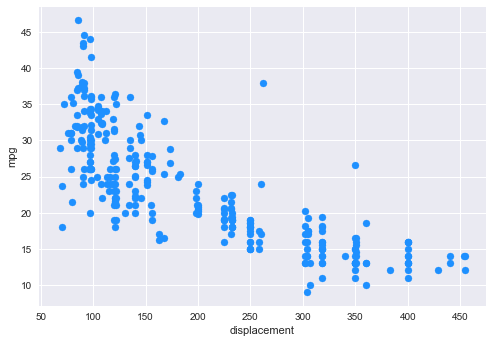

In [47]:
plt.scatter(X_train, y_train, color='dodgerblue')
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.show()

#### Initialize and fit the Linear Regression model (displacement and mpg)

In [48]:
model1 = LinearRegression(fit_intercept=True)
model1.fit(X_train, y_train)

LinearRegression()

#### Display the intercept and the slope (displacement and mpg)

In [49]:
model1.intercept_, model1.coef_

(35.43792105730903, array([-0.06138867]))

#### Predict outcomes using the test data (displacement and mpg)

In [50]:
y_predict = model1.predict(X_test)

#### Plot the train data and the line of best fit (displacement and mpg)

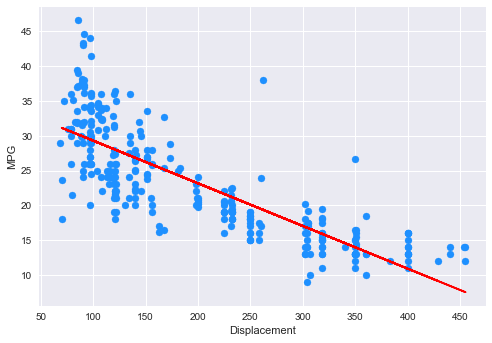

In [51]:
plt.scatter(X_train, y_train, color='dodgerblue')
plt.plot(X_test['displacement'], y_predict, color='red')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.show()

#### Plot the test data and the line of best fit (displacement and mpg)

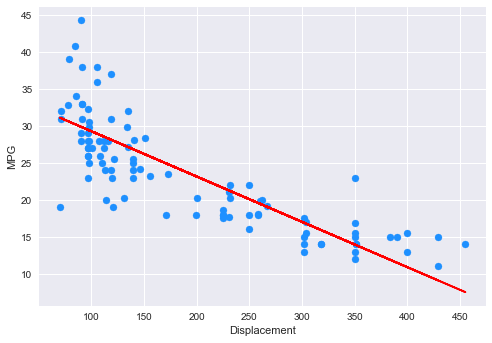

In [52]:
plt.scatter(X_test, y_test, color='dodgerblue')
plt.plot(X_test['displacement'], y_predict, color='red')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.show()

#### Display R-Squared value (displacement and mpg)

In [53]:
r2_score(y_test, y_predict)

0.6587751480601636

In [54]:
mean_squared_error(y_test, y_predict, squared=False)

4.29288787409861

## Model - 2 (horsepower vs mpg)

#### Create the training and test datasets (horsepower and mpg)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(auto_df[['horsepower']], auto_df['mpg'], test_size=0.25, random_state=101)

#### Display a scatter plot - horsepower vs mpg

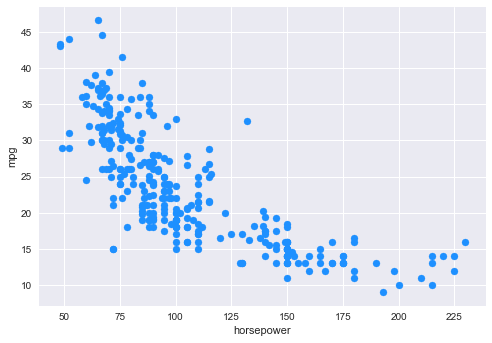

In [56]:
plt.scatter(X_train, y_train, color='dodgerblue')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.show()

#### Initialize and fit the Linear Regression model (horsepower and mpg)

In [57]:
model2 = LinearRegression(fit_intercept=True)
model2.fit(X_train, y_train)

LinearRegression()

#### Display the intercept and the slope (horsepower and mpg)

In [58]:
model2.intercept_, model2.coef_

(40.215102649870346, array([-0.15987969]))

#### Predict outcomes using the test data (horsepower and mpg)

In [59]:
y_predict = model2.predict(X_test)

#### Plot the test data and the line of best fit (horsepower and mpg)

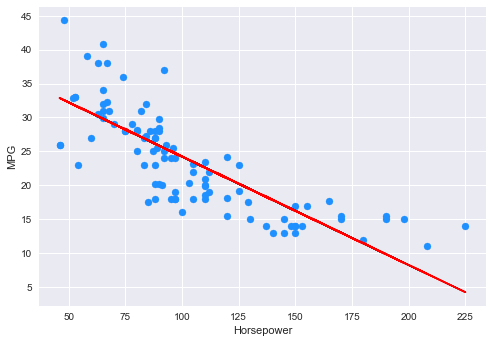

In [60]:
plt.scatter(X_test, y_test, color='dodgerblue')
plt.plot(X_test['horsepower'], y_predict, color='red')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

#### Display R-Squared value (horsepower and mpg)

In [61]:
r2_score(y_test, y_predict)

0.6227152143178122

## Model - 3 (weight vs mpg)

#### Create the training and test datasets (weight and mpg)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(auto_df[['weight']], auto_df['mpg'], test_size=0.25, random_state=101)

#### Display a scatter plot - weight vs mpg

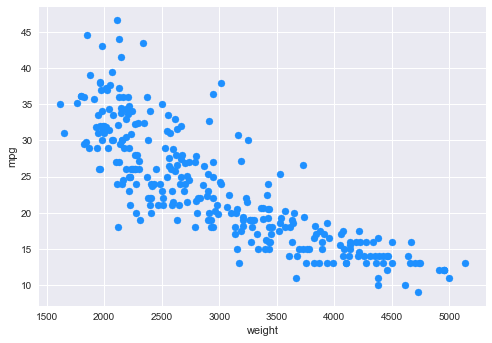

In [63]:
plt.scatter(X_train, y_train, color='dodgerblue')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

#### Initialize and fit the Linear Regression model (weight and mpg)

In [64]:
model3 = LinearRegression(fit_intercept=True)
model3.fit(X_train, y_train)

LinearRegression()

#### Display the intercept and the slope (weight and mpg)

In [65]:
model3.intercept_, model3.coef_

(46.5594962222021, array([-0.00771854]))

#### Predict outcomes using the test data (weight and mpg)

In [66]:
y_predict = model3.predict(X_test)

#### Plot the test data and the line of best fit (weight and mpg)

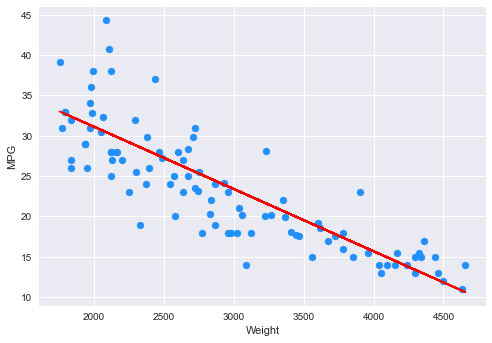

In [67]:
plt.scatter(X_test, y_test, color='dodgerblue')
plt.plot(X_test['weight'], y_predict, color='red')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

#### Display R-Squared value (weight and mpg)

In [68]:
r2_score(y_test, y_predict)

0.70785882325

In [69]:
model3.score(X_test, y_test)

0.70785882325